(37018, 79)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_a

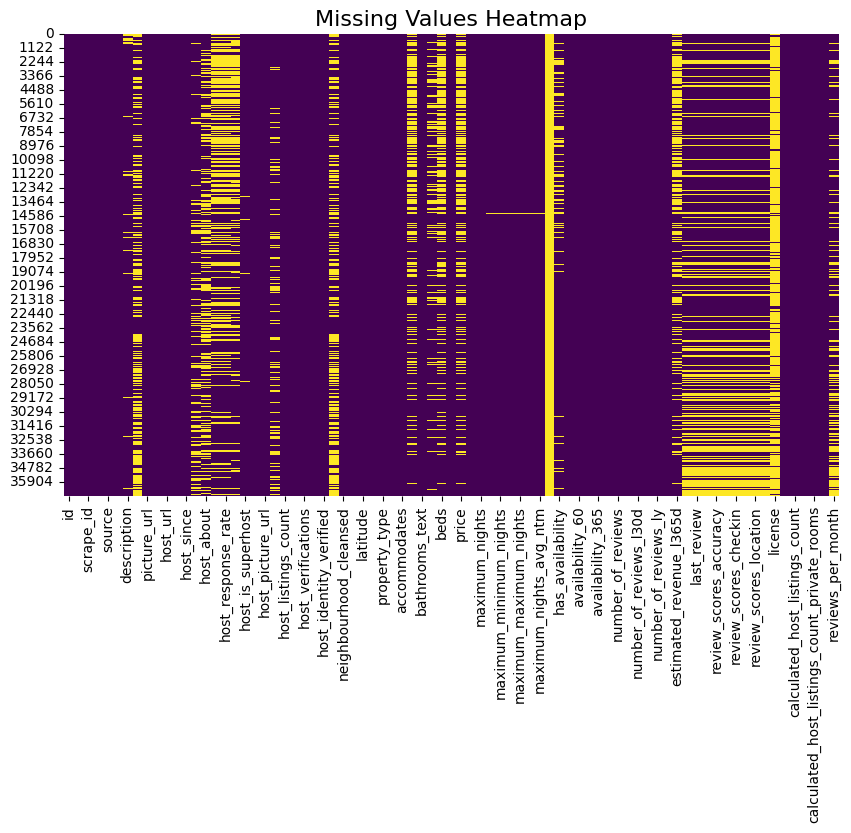

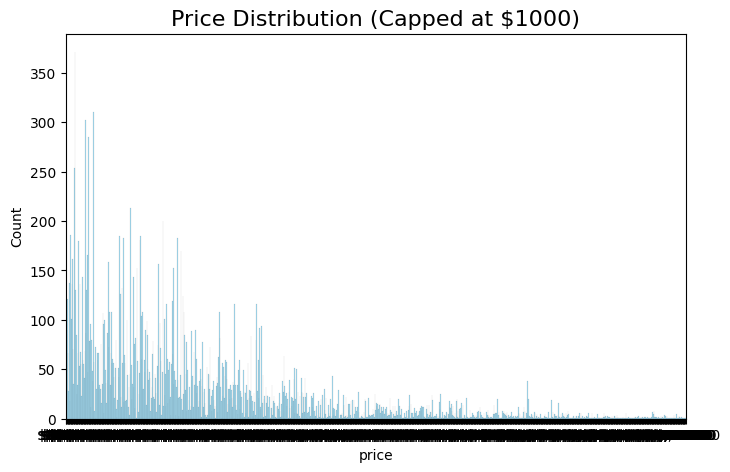

C:\Users\DERED4\AppData\Local\Temp\ipykernel_32180\2573918531.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood_group_cleansed', data=df, palette='Set2')


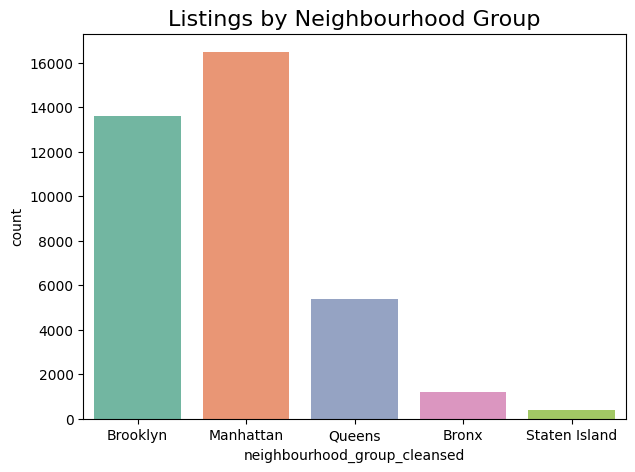

TypeError: can only concatenate str (not "int") to str

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/raw/listings.csv.gz", compression='gzip')

# Basic info
print(df.shape)
print(df.columns)
df.head()

# -------------------------------
# Missing values heatmap
# -------------------------------
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap", fontsize=16)
plt.show()

# -------------------------------
# Distribution of price
# -------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=100, color='skyblue')
plt.xlim(0, 1000)  # limit to avoid extreme outliers
plt.title("Price Distribution (Capped at $1000)", fontsize=16)
plt.show()

# -------------------------------
# Top neighbourhood groups
# -------------------------------
plt.figure(figsize=(7,5))
sns.countplot(x='neighbourhood_group_cleansed', data=df, palette='Set2')
plt.title("Listings by Neighbourhood Group", fontsize=16)
plt.show()

# -------------------------------
# Average price by neighbourhood group
# -------------------------------
avg_price = df.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)
avg_price.plot(kind='bar', color='coral', figsize=(7,5))
plt.ylabel("Average Price")
plt.title("Average Price by Neighbourhood Group", fontsize=16)
plt.show()

# -------------------------------
# Correlation heatmap (numeric columns)
# -------------------------------
plt.figure(figsize=(10,6))
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=16)
plt.show()
